In [24]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
pd.options.display.max_rows=10

In [25]:
stats=pd.read_csv("covid-data.csv")

In [123]:
stats

,iso_code,continent,COUNTRY,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121029,ZWE,Africa,Zimbabwe,2021-09-29,130485.0,213.0,240.143,4616.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121030,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.857,4623.0,7.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121031,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121032,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [10]:
stats.shape

(121034, 65)

In [12]:
stats.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 65, dtype: object

In [13]:
stats.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [27]:
countries=gpd.read_file('World_Countries_Generalized.shp') #importing a country dataset that we can use with geopandas

In [28]:
countries #checking to make sure the import worked

,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry
0,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060..."
1,Albania,AL,Albania,AL,"POLYGON ((2178614.504 5113950.867, 2179852.164..."
2,Algeria,DZ,Algeria,DZ,"POLYGON ((512443.030 4423494.247, 516027.527 4..."
3,American Samoa,AS,United States,US,"POLYGON ((-19007124.005 -1617338.540, -1900773..."
4,Andorra,AD,Andorra,AD,"POLYGON ((160949.743 5251578.747, 165479.439 5..."
...,...,...,...,...,...
246,Vietnam,VN,Viet Nam,VN,"MULTIPOLYGON (((11919975.671 1933404.703, 1192..."
247,Wallis and Futuna,WF,France,FR,"MULTIPOLYGON (((-19821639.593 -1611402.115, -1..."
248,Yemen,YE,Yemen,YE,"MULTIPOLYGON (((5260340.777 1530115.438, 52508..."
249,Zambia,ZM,Zambia,ZM,"POLYGON ((3363297.789 -1687093.287, 3363981.86..."


In [30]:
stats.rename(columns={'location': 'COUNTRY'}, inplace=True) #change stats location column to country

In [31]:
map_and_stats=countries.merge(stats, on="COUNTRY") #joining the two datasets

In [32]:
map_and_stats.head()

,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,geometry,iso_code,continent,date,total_cases,new_cases,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060...",AFG,Asia,2020-02-24,5.0,5.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060...",AFG,Asia,2020-02-25,5.0,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060...",AFG,Asia,2020-02-26,5.0,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060...",AFG,Asia,2020-02-27,5.0,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,Afghanistan,AF,Afghanistan,AF,"POLYGON ((6821274.810 4246712.610, 6823482.060...",AFG,Asia,2020-02-28,5.0,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [52]:
map_and_stats.columns

Index(['COUNTRY', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'geometry', 'iso_code',
       'continent', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinatio

In [54]:
# drop columns that will not be used in analysis
map_and_stats = map_and_stats.drop(['COUNTRYAFF', 'AFF_ISO', 'iso_code', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], axis=1) 

In [38]:
map_and_stats['COUNTRY'].unique() #requests unique countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar'

In [55]:
#create table for each country
data_Afghanistan=map_and_stats[map_and_stats.COUNTRY=="Afghanistan"]
data_Albania=map_and_stats[map_and_stats.COUNTRY=="Albania"]
data_Algeria=map_and_stats[map_and_stats.COUNTRY=="Algeria"]
data_Andorra=map_and_stats[map_and_stats.COUNTRY=="Andorra"]
data_Angola=map_and_stats[map_and_stats.COUNTRY=="Angola"]
data_Anguilla=map_and_stats[map_and_stats.COUNTRY=="Anguilla"]
data_Antigua_and_Barbuda=map_and_stats[map_and_stats.COUNTRY=="Antigua and Barbuda"]
data_Argentina=map_and_stats[map_and_stats.COUNTRY=="Argentina"]
data_Armenia=map_and_stats[map_and_stats.COUNTRY=="Armenia"]
data_Aruba=map_and_stats[map_and_stats.COUNTRY=="Aruba"]
data_Australia=map_and_stats[map_and_stats.COUNTRY=="Australia"]
data_Austria=map_and_stats[map_and_stats.COUNTRY=="Austria"]
data_Azerbaijan=map_and_stats[map_and_stats.COUNTRY=="Azerbaijan"]
data_Bahamas=map_and_stats[map_and_stats.COUNTRY=="Bahamas"]
data_Bahrain=map_and_stats[map_and_stats.COUNTRY=="Bahrain"]
data_Bangladesh=map_and_stats[map_and_stats.COUNTRY=="Bangladesh"]
data_Barbados=map_and_stats[map_and_stats.COUNTRY=="Barbados"]
data_Belarus=map_and_stats[map_and_stats.COUNTRY=="Belarus"]
data_Belgium=map_and_stats[map_and_stats.COUNTRY=="Belgium"]
data_Belize=map_and_stats[map_and_stats.COUNTRY=="Belize"]
data_Benin=map_and_stats[map_and_stats.COUNTRY=="Benin"]
data_Bermuda=map_and_stats[map_and_stats.COUNTRY=="Bermuda"]
data_Bhutan=map_and_stats[map_and_stats.COUNTRY=="Bhutan"]
data_Bolivia=map_and_stats[map_and_stats.COUNTRY=="Bolivia"]
data_Bosnia_and_Herzegovina=map_and_stats[map_and_stats.COUNTRY=="Bosnia and Herzegovina"]
data_Botswana=map_and_stats[map_and_stats.COUNTRY=="Botswana"]
data_Brazil=map_and_stats[map_and_stats.COUNTRY=="Brazil"]
data_British_Virgin_Islands=map_and_stats[map_and_stats.COUNTRY=="British Virgin Islands"]
data_Bulgaria=map_and_stats[map_and_stats.COUNTRY=="Bulgaria"]
data_Burkina_Faso=map_and_stats[map_and_stats.COUNTRY=="Burkina Faso"]
data_Burundi=map_and_stats[map_and_stats.COUNTRY=="Burundi"]
data_Cambodia=map_and_stats[map_and_stats.COUNTRY=="Cambodia"]
data_Cameroon=map_and_stats[map_and_stats.COUNTRY=="Cameroon"]
data_Canada=map_and_stats[map_and_stats.COUNTRY=="Canada"]
data_Cayman_Islands=map_and_stats[map_and_stats.COUNTRY=="Cayman Islands"]
data_Central_African_Republic=map_and_stats[map_and_stats.COUNTRY=="Central African Republic"]
data_Chad=map_and_stats[map_and_stats.COUNTRY=="Chad"]
data_Chile=map_and_stats[map_and_stats.COUNTRY=="Chile"]
data_China=map_and_stats[map_and_stats.COUNTRY=="China"]
data_Colombia=map_and_stats[map_and_stats.COUNTRY=="Colombia"]
data_Comoros=map_and_stats[map_and_stats.COUNTRY=="Comoros"]
data_Congo=map_and_stats[map_and_stats.COUNTRY=="Congo"]
data_Cook_Islands=map_and_stats[map_and_stats.COUNTRY=="Cook Islands"]
data_Costa_Rica=map_and_stats[map_and_stats.COUNTRY=="Costa Rica"]
data_Croatia=map_and_stats[map_and_stats.COUNTRY=="Croatia"]
data_Cuba=map_and_stats[map_and_stats.COUNTRY=="Cuba"]
data_Curacao=map_and_stats[map_and_stats.COUNTRY=="Curacao"]
data_Cyprus=map_and_stats[map_and_stats.COUNTRY=="Cyprus"]
data_Denmark=map_and_stats[map_and_stats.COUNTRY=="Denmark"]
data_Djibouti=map_and_stats[map_and_stats.COUNTRY=="Djibouti"]
data_Dominica=map_and_stats[map_and_stats.COUNTRY=="Dominica"]
data_Dominican_Republic=map_and_stats[map_and_stats.COUNTRY=="Dominican Republic"]
data_Ecuador=map_and_stats[map_and_stats.COUNTRY=="Ecuador"]
data_Egypt=map_and_stats[map_and_stats.COUNTRY=="Egypt"]
data_El_Salvador=map_and_stats[map_and_stats.COUNTRY=="El Salvador"]
data_Equatorial_Guinea=map_and_stats[map_and_stats.COUNTRY=="Equatorial Guinea"]
data_Eritrea=map_and_stats[map_and_stats.COUNTRY=="Eritrea"]
data_Estonia=map_and_stats[map_and_stats.COUNTRY=="Estonia"]
data_Eswatini=map_and_stats[map_and_stats.COUNTRY=="Eswatini"]
data_Ethiopia=map_and_stats[map_and_stats.COUNTRY=="Ethiopia"]
data_Falkland_Islands=map_and_stats[map_and_stats.COUNTRY=="Falkland Islands"]
data_Fiji=map_and_stats[map_and_stats.COUNTRY=="Fiji"]
data_Finland=map_and_stats[map_and_stats.COUNTRY=="Finland"]
data_France=map_and_stats[map_and_stats.COUNTRY=="France"]
data_French_Polynesia=map_and_stats[map_and_stats.COUNTRY=="French Polynesia"]
data_Gabon=map_and_stats[map_and_stats.COUNTRY=="Gabon"]
data_Gambia=map_and_stats[map_and_stats.COUNTRY=="Gambia"]
data_Georgia=map_and_stats[map_and_stats.COUNTRY=="Georgia"]
data_Germany=map_and_stats[map_and_stats.COUNTRY=="Germany"]
data_Ghana=map_and_stats[map_and_stats.COUNTRY=="Ghana"]
data_Gibraltar=map_and_stats[map_and_stats.COUNTRY=="Gibraltar"]
data_Greece=map_and_stats[map_and_stats.COUNTRY=="Greece"]
data_Greenland=map_and_stats[map_and_stats.COUNTRY=="Greenland"]
data_Grenada=map_and_stats[map_and_stats.COUNTRY=="Grenada"]
data_Guatemala=map_and_stats[map_and_stats.COUNTRY=="Guatemala"]
data_Guernsey=map_and_stats[map_and_stats.COUNTRY=="Guernsey"]
data_Guinea=map_and_stats[map_and_stats.COUNTRY=="Guinea"]
data_Guinea_Bissau=map_and_stats[map_and_stats.COUNTRY=="Guinea-Bissau"]
data_Guyana=map_and_stats[map_and_stats.COUNTRY=="Guyana"]
data_Haiti=map_and_stats[map_and_stats.COUNTRY=="Haiti"]
data_Honduras=map_and_stats[map_and_stats.COUNTRY=="Honduras"]
data_Hungary=map_and_stats[map_and_stats.COUNTRY=="Hungary"]
data_Iceland=map_and_stats[map_and_stats.COUNTRY=="Iceland"]
data_India=map_and_stats[map_and_stats.COUNTRY=="India"]
data_Indonesia=map_and_stats[map_and_stats.COUNTRY=="Indonesia"]
data_Iran=map_and_stats[map_and_stats.COUNTRY=="Iran"]
data_Iraq=map_and_stats[map_and_stats.COUNTRY=="Iraq"]
data_Ireland=map_and_stats[map_and_stats.COUNTRY=="Ireland"]
data_Isle_of_Man=map_and_stats[map_and_stats.COUNTRY=="Isle of Man"]
data_Israel=map_and_stats[map_and_stats.COUNTRY=="Israel"]
data_Italy=map_and_stats[map_and_stats.COUNTRY=="Italy"]
data_Jamaica=map_and_stats[map_and_stats.COUNTRY=="Jamaica"]
data_Japan=map_and_stats[map_and_stats.COUNTRY=="Japan"]
data_Jersey=map_and_stats[map_and_stats.COUNTRY=="Jersey"]
data_Jordan=map_and_stats[map_and_stats.COUNTRY=="Jordan"]
data_Kazakhstan=map_and_stats[map_and_stats.COUNTRY=="Kazakhstan"]
data_Kenya=map_and_stats[map_and_stats.COUNTRY=="Kenya"]
data_Kiribati=map_and_stats[map_and_stats.COUNTRY=="Kiribati"]
data_Kuwait=map_and_stats[map_and_stats.COUNTRY=="Kuwait"]
data_Kyrgyzstan=map_and_stats[map_and_stats.COUNTRY=="Kyrgyzstan"]
data_Laos=map_and_stats[map_and_stats.COUNTRY=="Laos"]
data_Latvia=map_and_stats[map_and_stats.COUNTRY=="Latvia"]
data_Lebanon=map_and_stats[map_and_stats.COUNTRY=="Lebanon"]
data_Lesotho=map_and_stats[map_and_stats.COUNTRY=="Lesotho"]
data_Liberia=map_and_stats[map_and_stats.COUNTRY=="Liberia"]
data_Libya=map_and_stats[map_and_stats.COUNTRY=="Libya"]
data_Liechtenstein=map_and_stats[map_and_stats.COUNTRY=="Liechtenstein"]
data_Lithuania=map_and_stats[map_and_stats.COUNTRY=="Lithuania"]
data_Luxembourg=map_and_stats[map_and_stats.COUNTRY=="Luxembourg"]
data_Madagascar=map_and_stats[map_and_stats.COUNTRY=="Madagascar"]
data_Malawi=map_and_stats[map_and_stats.COUNTRY=="Malawi"]
data_Malaysia=map_and_stats[map_and_stats.COUNTRY=="Malaysia"]
data_Maldives=map_and_stats[map_and_stats.COUNTRY=="Maldives"]
data_Mali=map_and_stats[map_and_stats.COUNTRY=="Mali"]
data_Malta=map_and_stats[map_and_stats.COUNTRY=="Malta"]
data_Marshall_Islands=map_and_stats[map_and_stats.COUNTRY=="Marshall Islands"]
data_Mauritania=map_and_stats[map_and_stats.COUNTRY=="Mauritania"]
data_Mauritius=map_and_stats[map_and_stats.COUNTRY=="Mauritius"]
data_Mexico=map_and_stats[map_and_stats.COUNTRY=="Mexico"]
data_Moldova=map_and_stats[map_and_stats.COUNTRY=="Moldova"]
data_Monaco=map_and_stats[map_and_stats.COUNTRY=="Monaco"]
data_Mongolia=map_and_stats[map_and_stats.COUNTRY=="Mongolia"]
data_Montenegro=map_and_stats[map_and_stats.COUNTRY=="Montenegro"]
data_Montserrat=map_and_stats[map_and_stats.COUNTRY=="Montserrat"]
data_Morocco=map_and_stats[map_and_stats.COUNTRY=="Morocco"]
data_Mozambique=map_and_stats[map_and_stats.COUNTRY=="Mozambique"]
data_Myanmar=map_and_stats[map_and_stats.COUNTRY=="Myanmar"]
data_Namibia=map_and_stats[map_and_stats.COUNTRY=="Namibia"]
data_Nauru=map_and_stats[map_and_stats.COUNTRY=="Nauru"]
data_Nepal=map_and_stats[map_and_stats.COUNTRY=="Nepal"]
data_Netherlands=map_and_stats[map_and_stats.COUNTRY=="Netherlands"]
data_New_Caledonia=map_and_stats[map_and_stats.COUNTRY=="New Caledonia"]
data_New_Zealand=map_and_stats[map_and_stats.COUNTRY=="New Zealand"]
data_Nicaragua=map_and_stats[map_and_stats.COUNTRY=="Nicaragua"]
data_Niger=map_and_stats[map_and_stats.COUNTRY=="Niger"]
data_Nigeria=map_and_stats[map_and_stats.COUNTRY=="Nigeria"]
data_Niue=map_and_stats[map_and_stats.COUNTRY=="Niue"]
data_North_Macedonia=map_and_stats[map_and_stats.COUNTRY=="North Macedonia"]
data_Norway=map_and_stats[map_and_stats.COUNTRY=="Norway"]
data_Oman=map_and_stats[map_and_stats.COUNTRY=="Oman"]
data_Pakistan=map_and_stats[map_and_stats.COUNTRY=="Pakistan"]
data_Palau=map_and_stats[map_and_stats.COUNTRY=="Palau"]
data_Panama=map_and_stats[map_and_stats.COUNTRY=="Panama"]
data_Papua_New_Guinea=map_and_stats[map_and_stats.COUNTRY=="Papua New Guinea"]
data_Paraguay=map_and_stats[map_and_stats.COUNTRY=="Paraguay"]
data_Peru=map_and_stats[map_and_stats.COUNTRY=="Peru"]
data_Philippines=map_and_stats[map_and_stats.COUNTRY=="Philippines"]
data_Pitcairn=map_and_stats[map_and_stats.COUNTRY=="Pitcairn"]
data_Poland=map_and_stats[map_and_stats.COUNTRY=="Poland"]
data_Portugal=map_and_stats[map_and_stats.COUNTRY=="Portugal"]
data_Qatar=map_and_stats[map_and_stats.COUNTRY=="Qatar"]
data_Romania=map_and_stats[map_and_stats.COUNTRY=="Romania"]
data_Rwanda=map_and_stats[map_and_stats.COUNTRY=="Rwanda"]
data_Saint_Helena=map_and_stats[map_and_stats.COUNTRY=="Saint Helena"]
data_Saint_Kitts_and_Nevis=map_and_stats[map_and_stats.COUNTRY=="Saint Kitts and Nevis"]
data_Saint_Lucia=map_and_stats[map_and_stats.COUNTRY=="Saint Lucia"]
data_Saint_Vincent_and_the_Grenadines=map_and_stats[map_and_stats.COUNTRY=="Saint Vincent and the Grenadines"]
data_Samoa=map_and_stats[map_and_stats.COUNTRY=="Samoa"]
data_San_Marino=map_and_stats[map_and_stats.COUNTRY=="San Marino"]
data_Sao_Tome_and_Principe=map_and_stats[map_and_stats.COUNTRY=="Sao Tome and Principe"]
data_Saudi_Arabia=map_and_stats[map_and_stats.COUNTRY=="Saudi Arabia"]
data_Senegal=map_and_stats[map_and_stats.COUNTRY=="Senegal"]
data_Serbia=map_and_stats[map_and_stats.COUNTRY=="Serbia"]
data_Seychelles=map_and_stats[map_and_stats.COUNTRY=="Seychelles"]
data_Sierra_Leone=map_and_stats[map_and_stats.COUNTRY=="Sierra Leone"]
data_Singapore=map_and_stats[map_and_stats.COUNTRY=="Singapore"]
data_Slovakia=map_and_stats[map_and_stats.COUNTRY=="Slovakia"]
data_Slovenia=map_and_stats[map_and_stats.COUNTRY=="Slovenia"]
data_Solomon_Islands=map_and_stats[map_and_stats.COUNTRY=="Solomon Islands"]
data_Somalia=map_and_stats[map_and_stats.COUNTRY=="Somalia"]
data_South_Africa=map_and_stats[map_and_stats.COUNTRY=="South Africa"]
data_South_Korea=map_and_stats[map_and_stats.COUNTRY=="South Korea"]
data_South_Sudan=map_and_stats[map_and_stats.COUNTRY=="South Sudan"]
data_Spain=map_and_stats[map_and_stats.COUNTRY=="Spain"]
data_Sri_Lanka=map_and_stats[map_and_stats.COUNTRY=="Sri Lanka"]
data_Sudan=map_and_stats[map_and_stats.COUNTRY=="Sudan"]
data_Suriname=map_and_stats[map_and_stats.COUNTRY=="Suriname"]
data_Sweden=map_and_stats[map_and_stats.COUNTRY=="Sweden"]
data_Switzerland=map_and_stats[map_and_stats.COUNTRY=="Switzerland"]
data_Syria=map_and_stats[map_and_stats.COUNTRY=="Syria"]
data_Tajikistan=map_and_stats[map_and_stats.COUNTRY=="Tajikistan"]
data_Tanzania=map_and_stats[map_and_stats.COUNTRY=="Tanzania"]
data_Thailand=map_and_stats[map_and_stats.COUNTRY=="Thailand"]
data_Togo=map_and_stats[map_and_stats.COUNTRY=="Togo"]
data_Tokelau=map_and_stats[map_and_stats.COUNTRY=="Tokelau"]
data_Tonga=map_and_stats[map_and_stats.COUNTRY=="Tonga"]
data_Trinidad_and_Tobago=map_and_stats[map_and_stats.COUNTRY=="Trinidad and Tobago"]
data_Tunisia=map_and_stats[map_and_stats.COUNTRY=="Tunisia"]
data_Turkmenistan=map_and_stats[map_and_stats.COUNTRY=="Turkmenistan"]
data_Turks_and_Caicos_Islands=map_and_stats[map_and_stats.COUNTRY=="Turks and Caicos Islands"]
data_Tuvalu=map_and_stats[map_and_stats.COUNTRY=="Tuvalu"]
data_Uganda=map_and_stats[map_and_stats.COUNTRY=="Uganda"]
data_Ukraine=map_and_stats[map_and_stats.COUNTRY=="Ukraine"]
data_United_Arab_Emirates=map_and_stats[map_and_stats.COUNTRY=="United Arab Emirates"]
data_United_Kingdom=map_and_stats[map_and_stats.COUNTRY=="United Kingdom"]
data_United_States=map_and_stats[map_and_stats.COUNTRY=="United States"]
data_Uruguay=map_and_stats[map_and_stats.COUNTRY=="Uruguay"]
data_Uzbekistan=map_and_stats[map_and_stats.COUNTRY=="Uzbekistan"]
data_Vanuatu=map_and_stats[map_and_stats.COUNTRY=="Vanuatu"]
data_Venezuela=map_and_stats[map_and_stats.COUNTRY=="Venezuela"]
data_Vietnam=map_and_stats[map_and_stats.COUNTRY=="Vietnam"]
data_Wallis_and_Futuna=map_and_stats[map_and_stats.COUNTRY=="Wallis and Futuna"]
data_Yemen=map_and_stats[map_and_stats.COUNTRY=="Yemen"]
data_Zambia=map_and_stats[map_and_stats.COUNTRY=="Zambia"]
data_Zimbabwe=map_and_stats[map_and_stats.COUNTRY=="Zimbabwe"]

In [124]:
data_Congo #cleaned data for the country of Congo in the continent of Africa

,COUNTRY,ISO,geometry,continent,date,total_cases,new_cases
22030,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2020-03-15,1.0,1.0
22031,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2020-03-16,1.0,0.0
22032,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2020-03-17,1.0,0.0
22033,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2020-03-18,1.0,0.0
22034,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2020-03-19,3.0,2.0
...,...,...,...,...,...,...,...
22593,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2021-09-29,14244.0,0.0
22594,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2021-09-30,14244.0,0.0
22595,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2021-10-01,14359.0,115.0
22596,Congo,CG,"POLYGON ((1768922.388 -439280.619, 1767784.921...",Africa,2021-10-02,14359.0,0.0


In [66]:
#Finding the average of each country
GroupedCountry=map_and_stats.groupby(['ISO'])

In [86]:
#Sum and average of cases per country
sumTotal=map_and_stats.groupby('COUNTRY')['new_cases'].agg(['sum', 'mean'])
sumTotal

,sum,mean
COUNTRY,,
Afghanistan,155191.0,263.930272
Albania,171794.0,299.292683
Algeria,203789.0,347.170358
Andorra,15222.0,26.199656
Angola,58943.0,104.694494
...,...,...
Vietnam,808578.0,1304.158065
Wallis and Futuna,0.0,NaN
Yemen,9139.0,16.861624


In [121]:
#Add the location data back in
worldData=countries.merge(sumTotal, on="COUNTRY") #joining the two datasets
worldData.rename(columns={'sum': 'New Cases Sum', 'mean': 'New Cases Mean'}, inplace=True)
worldData.to_csv('CovidData.csv')

In [94]:
#create a chloropleth world map from our table with sum and average new cases, plus the geometry info

<Axes: >

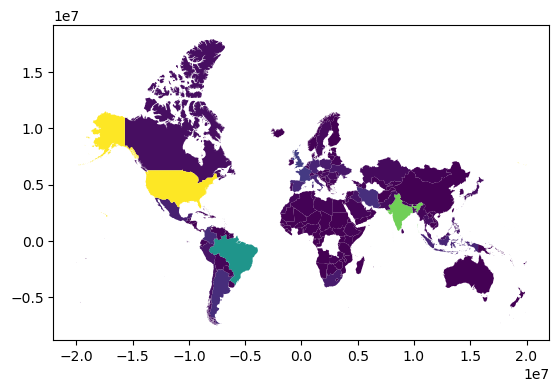

In [113]:
worldData.plot(column='New Cases Mean')

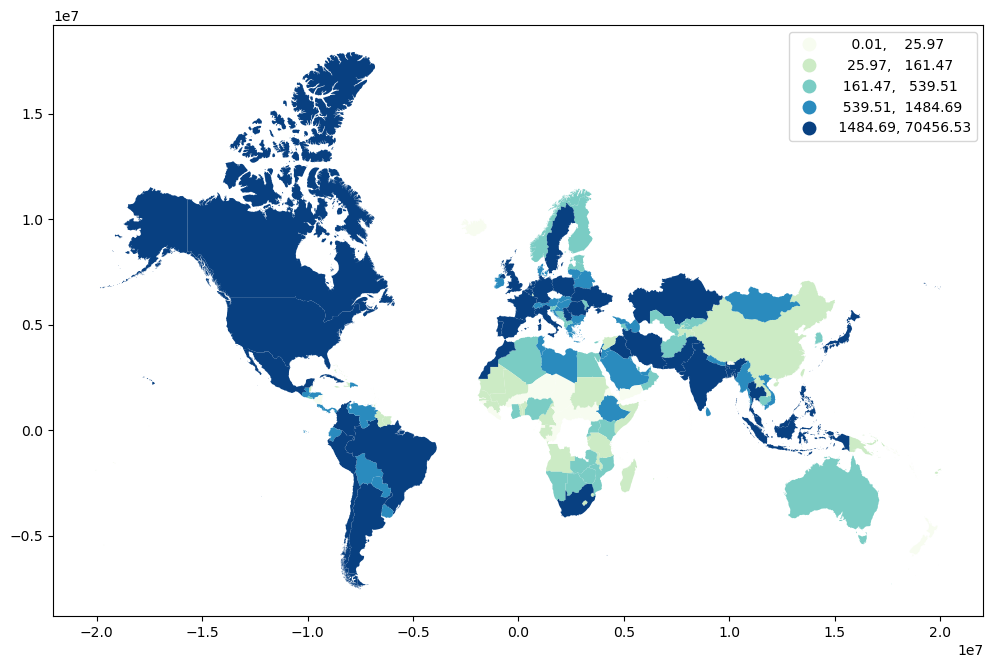

In [104]:
fig, ax=plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
worldData.plot(column='New Cases Mean', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)
fig.savefig('CovidAverageMap.png')